We are going to classify images using a pretrained `ResNet50` model right "out of the box".

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
import requests

# links to two images that we'll use with our pre-trained model
image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

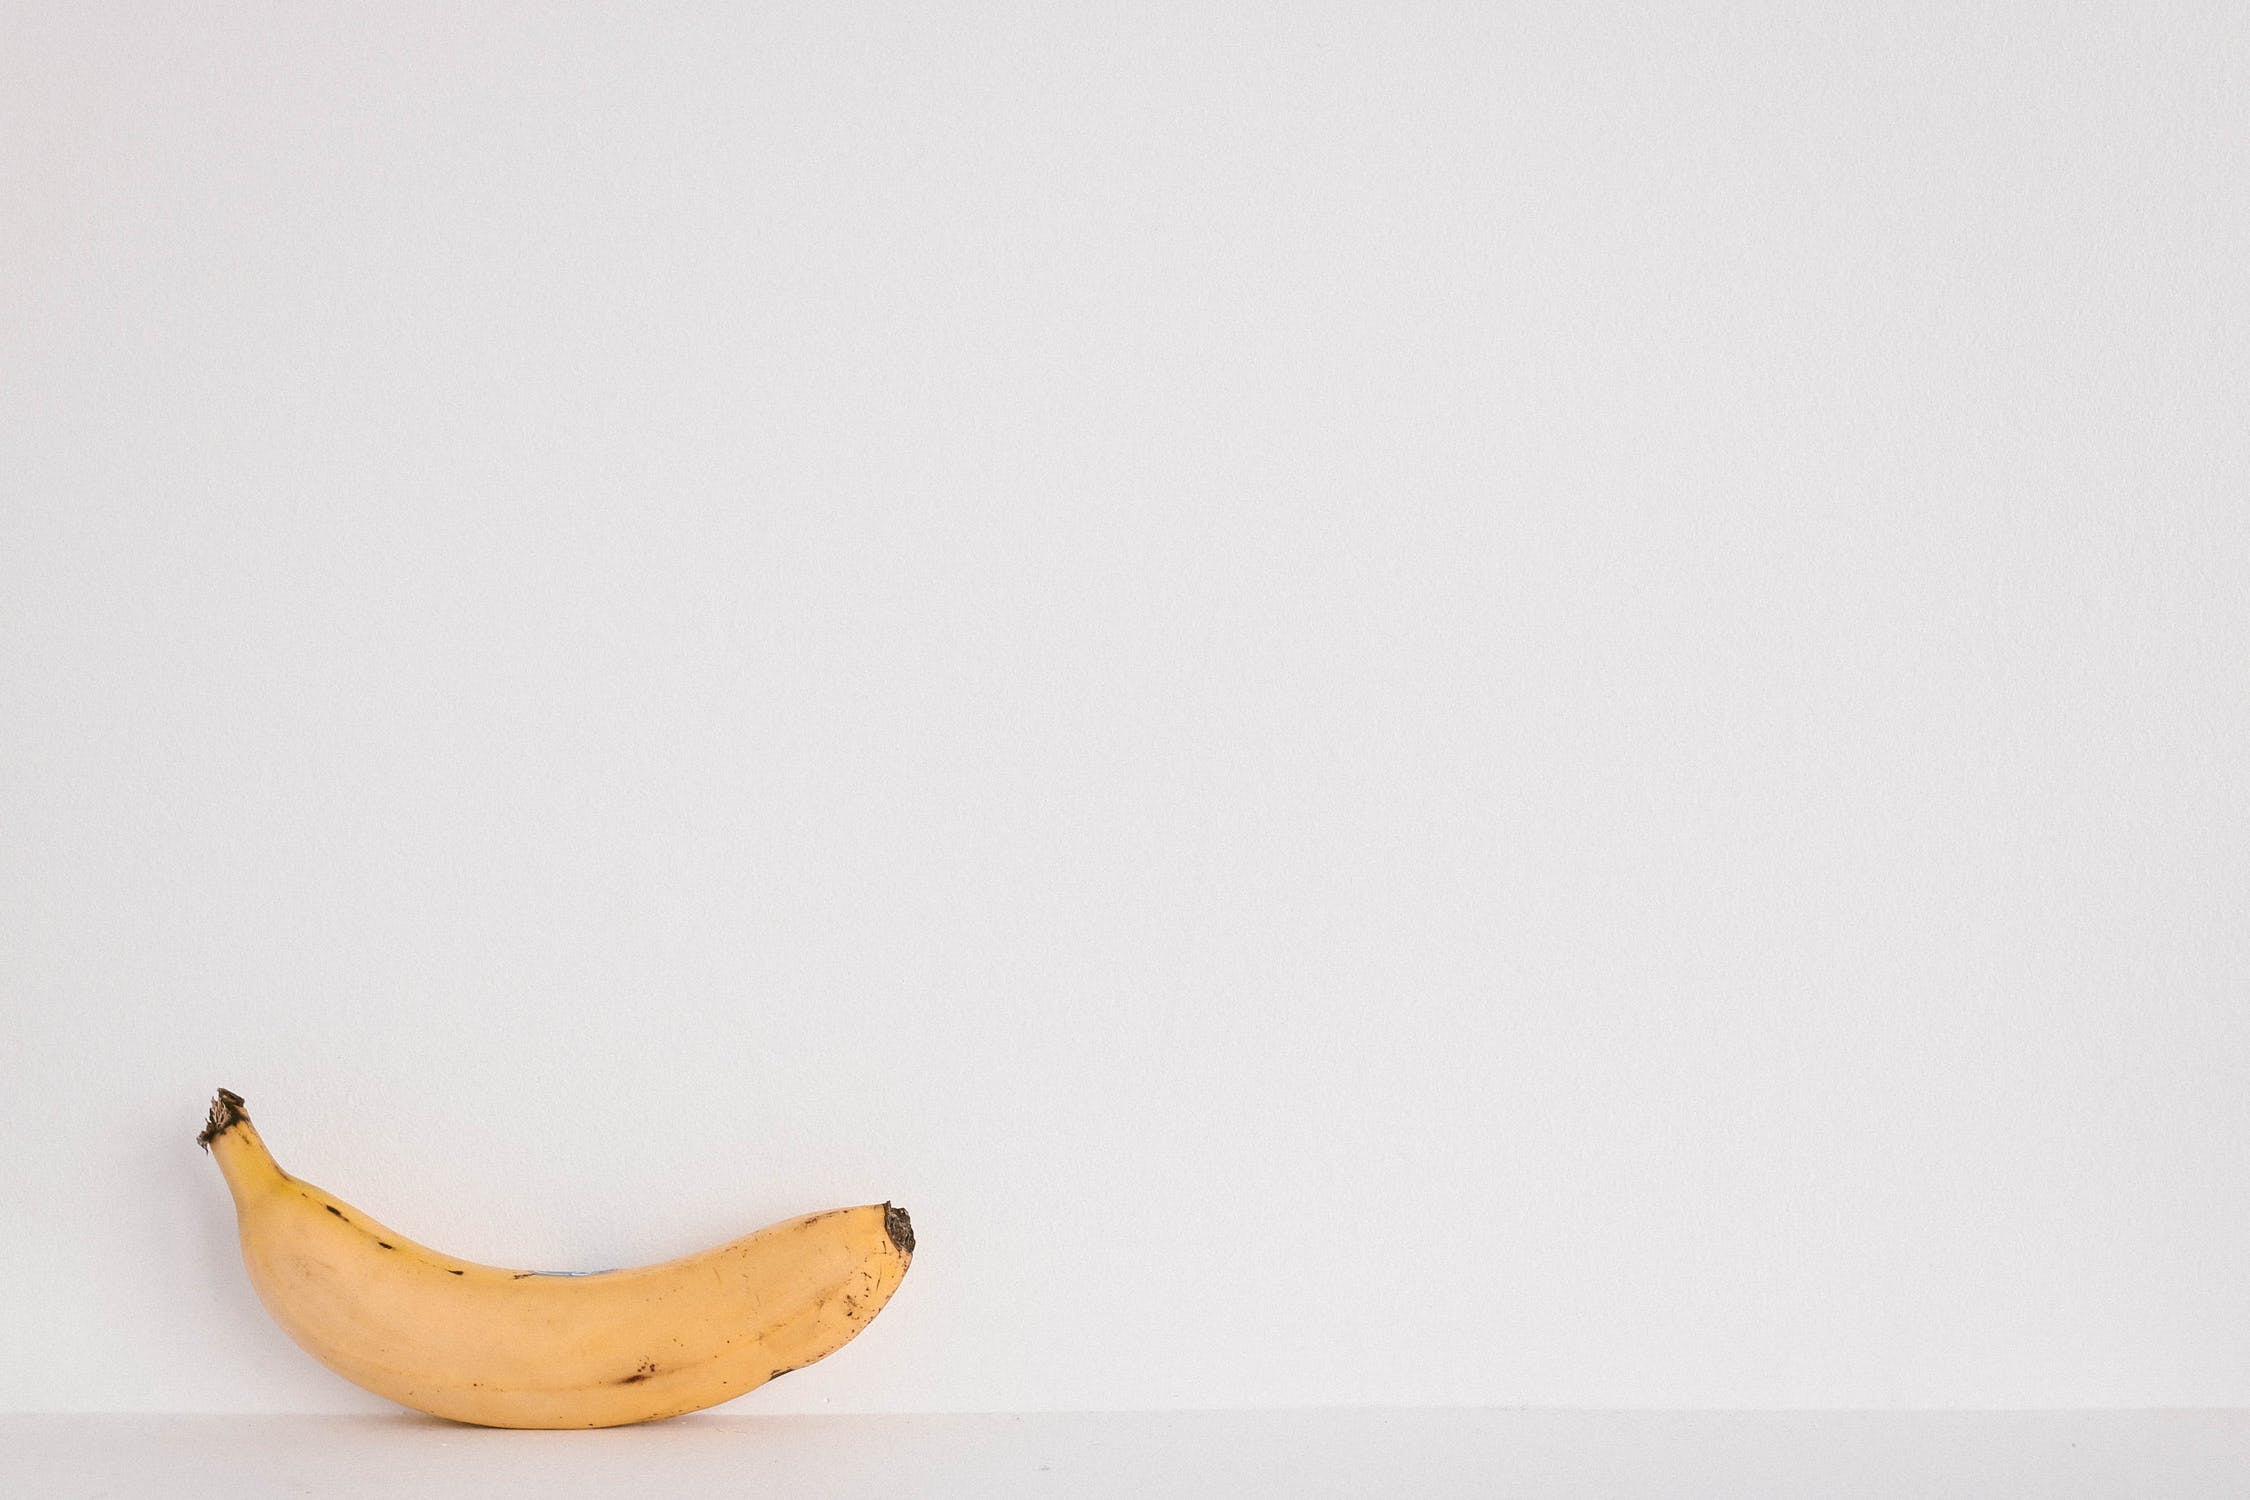

In [3]:
from IPython.display import Image
Image(filename='./example1.jpg', width=600)

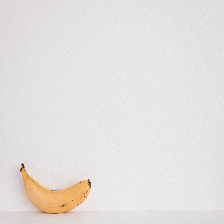

In [4]:
#plt.imshow(process_img_path('./example1.jpg'))
img = image.load_img('./example1.jpg', target_size=(224, 224))
img


<function matplotlib.pyplot.show(*args, **kw)>

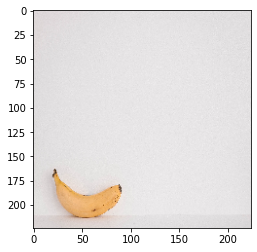

In [5]:
plt.imshow(img)
plt.show

In [6]:
#dir(img)

In [7]:
#has to be 224x224 before getting passed to ResNet50
img.size

(224, 224)

In [8]:
x = image.img_to_array(img)
# turns it into a numpy array
# should show the 3 color channels as a third dimension
x.shape

(224, 224, 3)

In [9]:
# resnet50 was trained on a whole LIST of images, 
# so we need to add one more dimension before getting predictions
x = np.expand_dims(x, axis=0)
x.shape

#or np.array([x]).shape
#THIS IS FINAL SHAPE WE NEED TO GET PREDICTIONS

(1, 224, 224, 3)

In [10]:
# instantiate pretrained ResNet50 model
model = ResNet50(weights='imagenet')

# get classification of image
features = model.predict(x)
# print('shape of predictions ', features.shape)

# docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
results = decode_predictions(features, top=5)[0]

results

[('n03532672', 'hook', 0.24486573),
 ('n03065424', 'coil', 0.08958712),
 ('n03447447', 'gondola', 0.06523056),
 ('n01950731', 'sea_slug', 0.0408362),
 ('n03627232', 'knot', 0.027312785)]

In [11]:
def process_img_path(img_path):
    """
    Using tensorflow per-build image processor. 

    Returns processed image. 
    """
    # resize the image
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    return image.load_img(img_path, target_size=(224, 224))

In [12]:
def process_img_path(img_path):
    """
    Using tensorflow per-build image processor. 

    Returns processed image. 
    """
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    return image.load_img(img_path, target_size=(224, 224))

# Decide whether any of the three most likely image classes is "banana"
def img_contains_banana(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    # turn it into a numpy array
    x = image.img_to_array(img)
    print("Processed image shape:", x.shape)
    #Putting the image in a list
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print('x.shape after preprocess_input and expend_dims:', x.shape)
    
    # instantiate pretrained ResNet50 model
    model = ResNet50(weights='imagenet')
    
    # get classification of image
    features = model.predict(x)
    print('shape of predictions ', features.shape)
    
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=5)[0]

    return results
 
    # return True if 'banana' is among the top 3 predictions
    # detected_banana = False
    # for entry in results:
    #     print(entry)
    #     if entry[1] == 'banana':
    #         detected_banana = True
    # return detected_banana

### Let's have a look at the ResNet50 model architecture
We imported the ResNet50 model, including the $25,583,592$ parameters (weights and biases) that were trained using the ImageNet data set!

In [13]:
model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Now let's use our `ResNet50` model to classify a few images and see whether it thinks they are a banana. <br>
Our `img_contains_banana` function returns `True` if any of the top 3 predicted classes is `banana`.

In [14]:
import requests

# links to two images that we'll use with our pre-trained model
image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

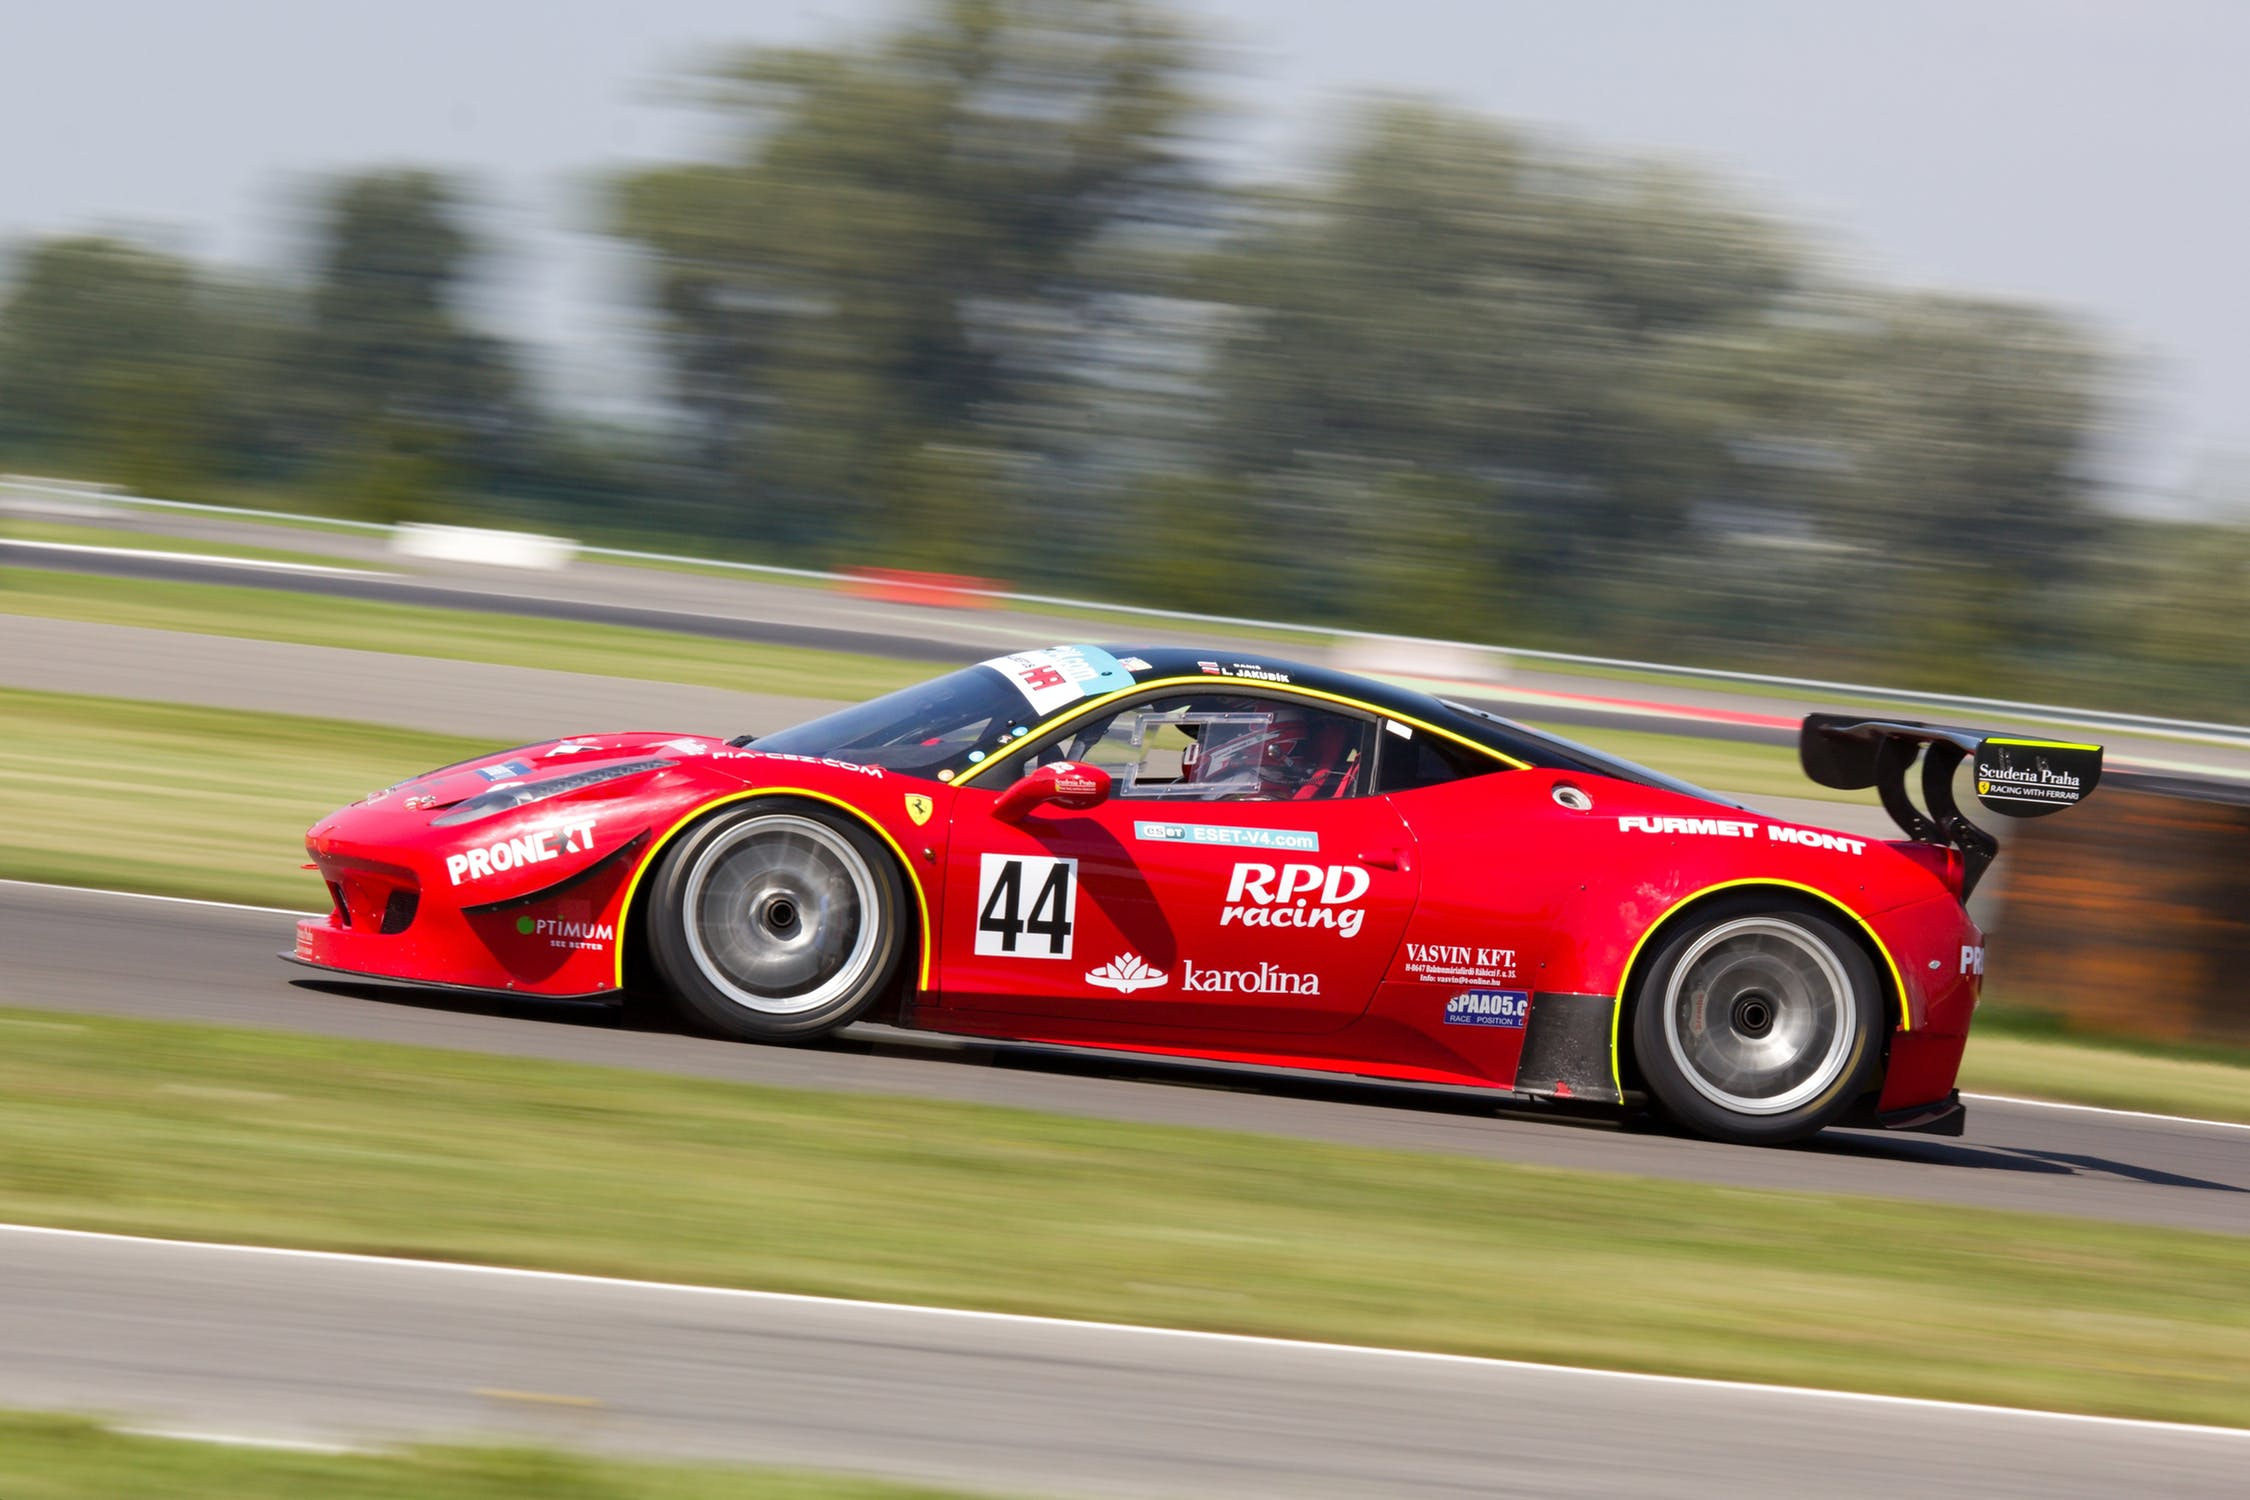

In [15]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [16]:
processed_image = process_img_path('example0.jpg')

img_contains_banana(processed_image)
# This function returns the results of the 5 classes with the highest probability 
#This says it is a 93% chance it is a race car

Processed image shape: (224, 224, 3)
x.shape after preprocess_input and expend_dims: (1, 224, 224, 3)
shape of predictions  (1, 1000)


[('n04037443', 'racer', 0.92562824),
 ('n04285008', 'sports_car', 0.07028788),
 ('n04461696', 'tow_truck', 0.0021220448),
 ('n02974003', 'car_wheel', 0.0014671568),
 ('n03100240', 'convertible', 0.00029069255)]

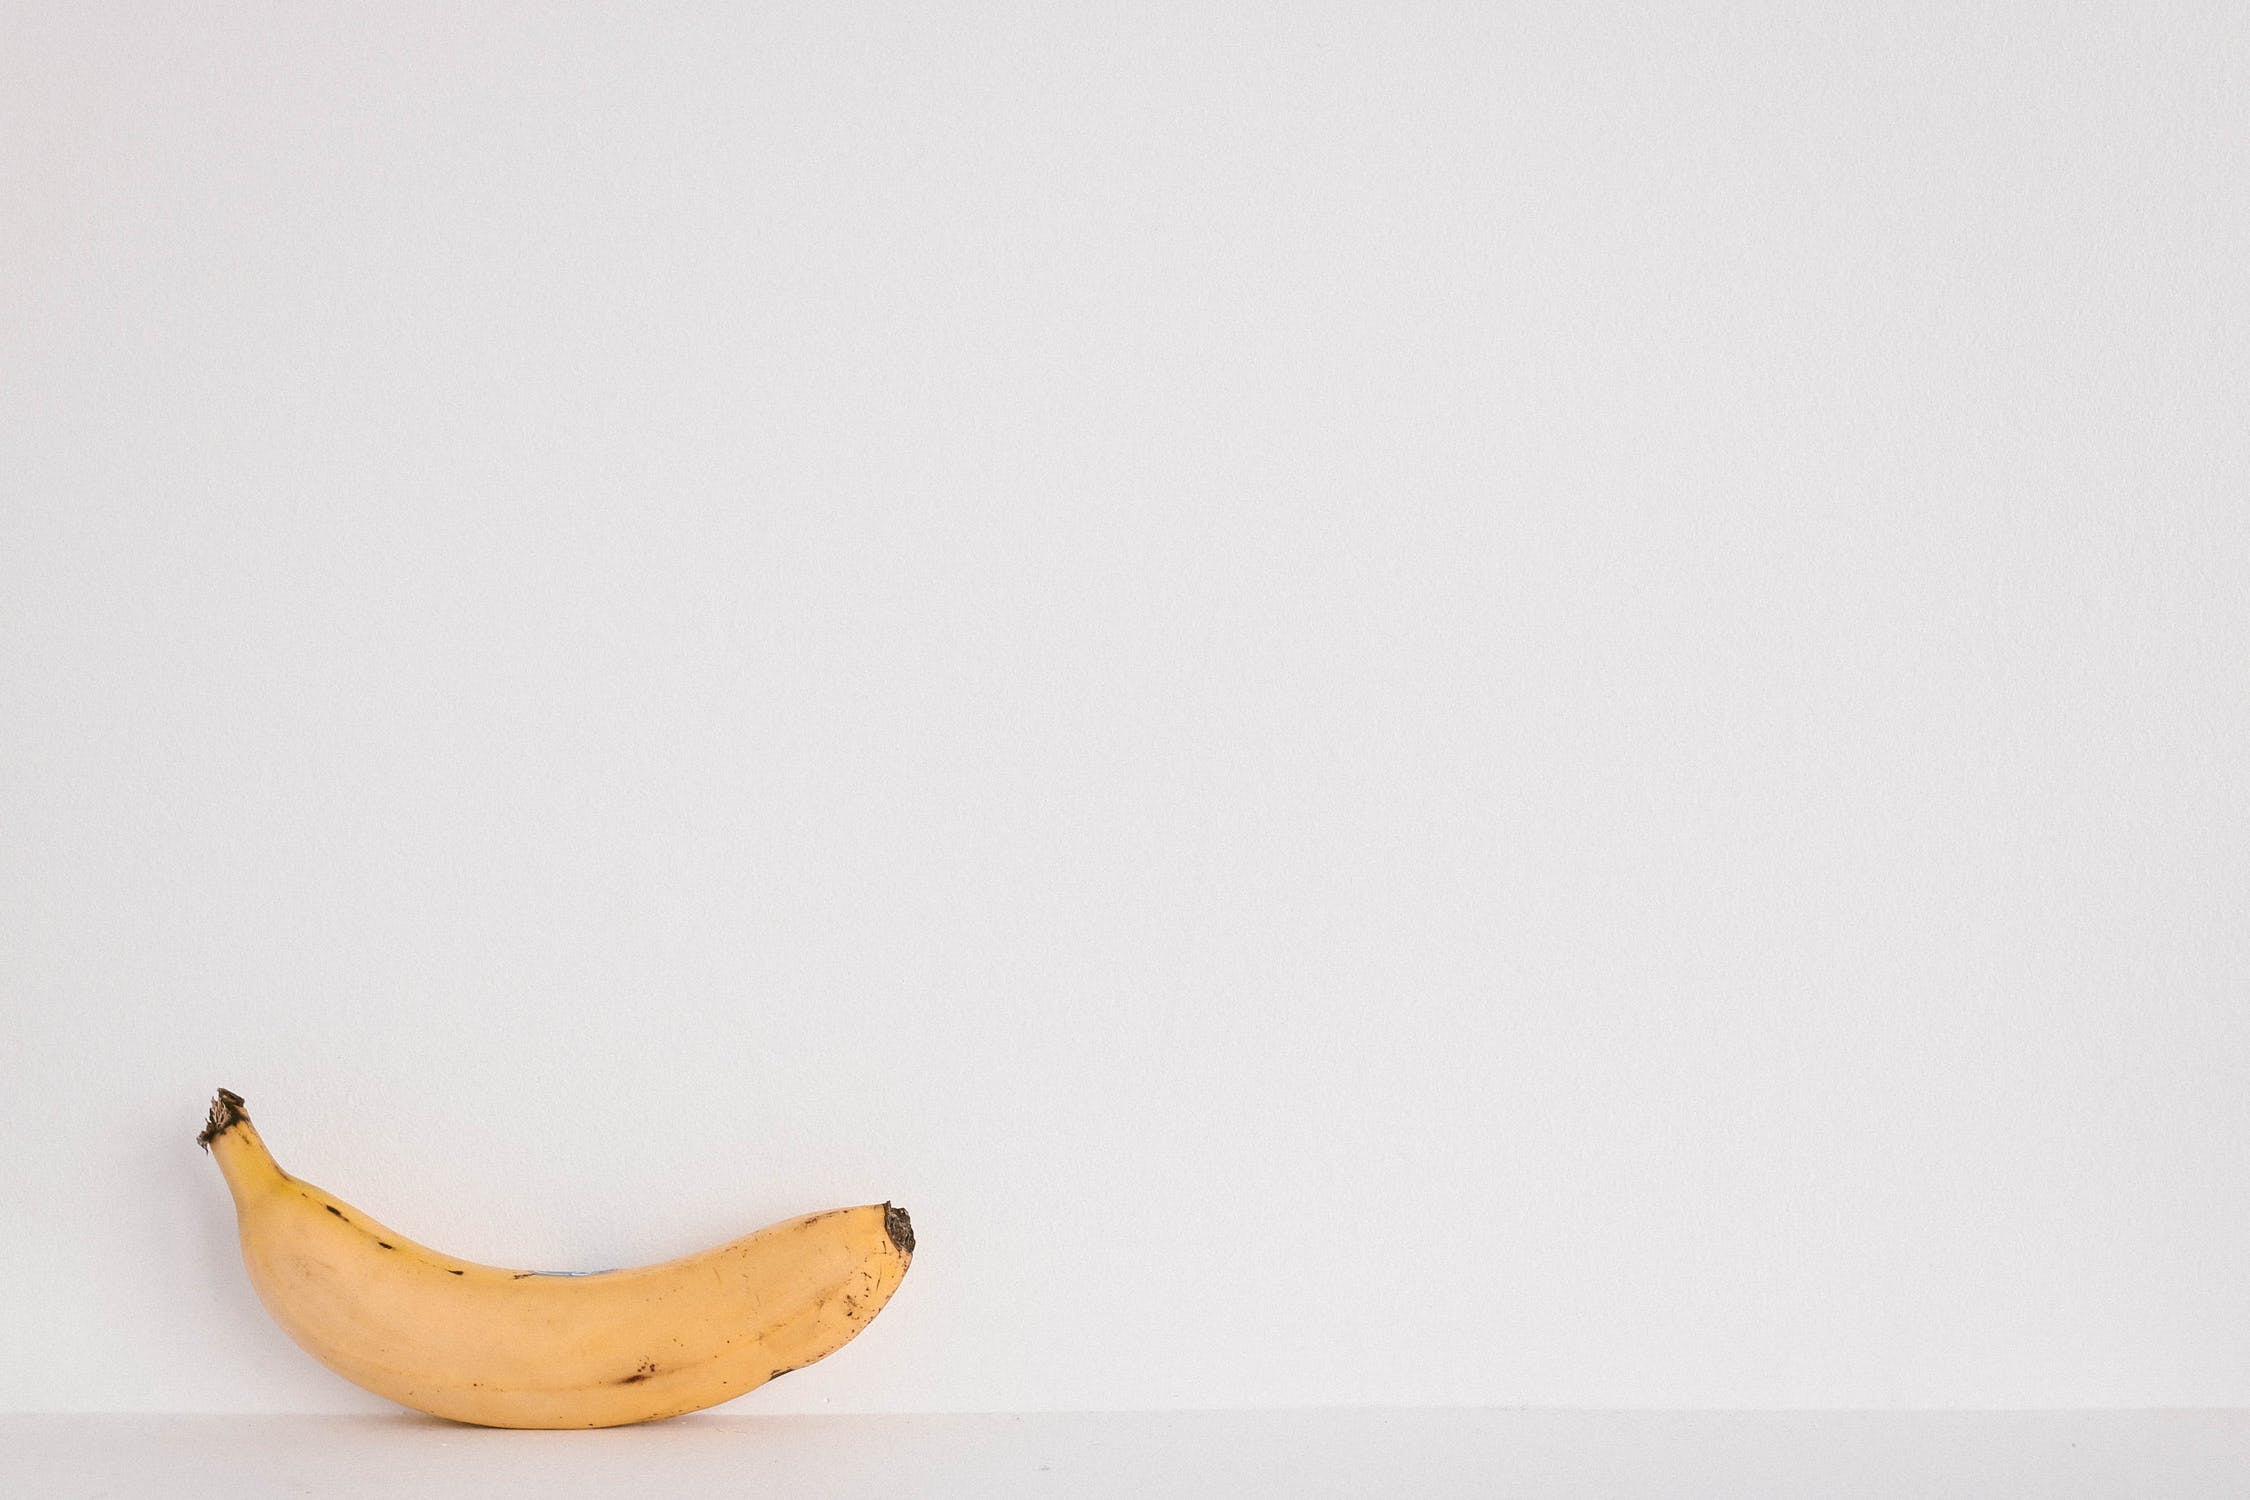

In [17]:
Image(filename='example1.jpg', width=600)

In [18]:
img_contains_banana(process_img_path('example1.jpg'))
# 7% chance it is a hook 7% chance it is a banana. It is not quite sure  

Processed image shape: (224, 224, 3)
x.shape after preprocess_input and expend_dims: (1, 224, 224, 3)
shape of predictions  (1, 1000)


[('n03532672', 'hook', 0.077739574),
 ('n07753592', 'banana', 0.070150524),
 ('n03498962', 'hatchet', 0.06332101),
 ('n03598930', 'jigsaw_puzzle', 0.050685845),
 ('n04228054', 'ski', 0.016942777)]

Notice that, while it gets it right, the confidence for the `banana` classification is only $7\%$, lower than the confidence for `hook`! <br>
That's likely because so much of the image is "not-banana", i.e. white pixels! 